In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# read dataset
data = pd.read_excel("watermelon3.0Alpha.xlsx")
data.columns = ['density','sugarContent','isGood']
data.head(5)

,density,sugarContent,isGood
0,0.697,0.460,1
1,0.774,0.376,1
2,0.634,0.264,1
3,0.608,0.318,1
4,0.556,0.215,1


In [26]:
# get two class
data_np  = np.array(data)
data1 = []
data0 = []
for x in data_np:
    if x[2] == 1:
        data1.append(x[[0,1]])
    else :
        data0.append(x[[0,1]])
data0

[array([0.666, 0.091]),
 array([0.243, 0.267]),
 array([0.245, 0.057]),
 array([0.343, 0.099]),
 array([0.639, 0.161]),
 array([0.657, 0.198]),
 array([0.36, 0.37]),
 array([0.593, 0.042]),
 array([0.719, 0.103])]

In [31]:
mean0 = np.mean(data0)
mean1 = np.mean(data1)
mean0


array([0.49611111, 0.15422222])

In [34]:
diff1 = data1 - mean1
diff0 = data0 - mean0
# 协方差
cov1 = np.dot(np.transpose(diff1), diff1)
cov0 = np.dot(np.transpose(diff0), diff0)
# 类内散度矩阵
Sw = cov1 + cov0
# 类间散度矩阵
Sb=np.dot(np.transpose(mean0-mean1),(mean0-mean1))
Sw_Inv=np.linalg.inv(Sw)
# weight
w=np.dot(Sw_Inv,mean0-mean1)


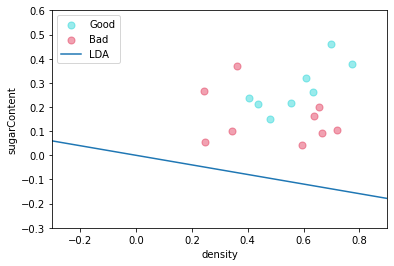

In [39]:
# daraw line
plt.xlabel("density")
plt.ylabel("sugarContent")
plt.xlim(xmax = 0.9,xmin = -0.3)
plt.ylim(ymax = 0.6,ymin = -0.3)
x1 = []
y1 = []
x2 = []
y2 = []
for x in data_np:
    if x[2]==1:
        x1.append(x[0])
        y1.append(x[1])
    else:
        x2.append(x[0])
        y2.append(x[1])
colors1 = '#00CED1'  # 点的颜色
colors2 = '#DC143C'
area = np.pi * 4 ** 2  # 点面积
plt.scatter(x1, y1, s=area, c=colors1, alpha=0.4, label='Good')
plt.scatter(x2, y2, s=area, c=colors2, alpha=0.4, label='Bad')
plt.plot([0, 9.5], [9.5, 0], linewidth='0.5', color='#000000')
# plot line
w = w.flatten()
x1 = np.linspace(-1, 1, 102)
x2 = -w[0] * x1 / w[1]
plt.plot(x1, x2, label="LDA")
plt.legend()
plt.savefig('imgs/h2_3.5.png', dpi=300)
plt.show()
